### <span style="color:red"> TO DO: legenda for plots, other aesthetic aspects. C++ organization of files and functions </span>
# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Lab01: Notes </span>

## <span> Exercise 01.1 </span>
- This is how the code should look in C++:

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
np.random.seed(0)     # Fixing random seed for reproducibility
r = np.random.rand(M) # U[0,1) uniform distribution

x = np.arange(N)      # [0,1,2,...,N-1]: N blocks of measures (lenght L)
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N): #N blocks
    sum = 0
    #sum2 = 0             ### sum2 procedure: ERROR. Use the square of the single measure, not of the sum
    for j in range(L):    ### Use instead <Av2> = Av^2 for each block!
        k = j+i*L
        sum += r[k]
        #sum2 += r[k]*r[k] 
    ave[i] = sum/L       # r_i 
    av2[i] = (ave[i])**2 # (r_i)^2 
    #av2[i]  = sum2/L ### Error!

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
        su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    NOTE: for each block the value $\langle A_i^2\rangle$ is just $\langle A_i\rangle^2$, since it is considered as a single measure: <font color="red"> calculating $\langle A_i^2\rangle = \frac {1}{N}\sum r_i^2$ for each block is WRONG</font>.
Instead, the total average is correctly evaluated with $\langle A^2 \rangle = \frac{1}{N}\sum{A_i^2} \neq (\frac{1}{N}\sum{A_i})^2$</p>

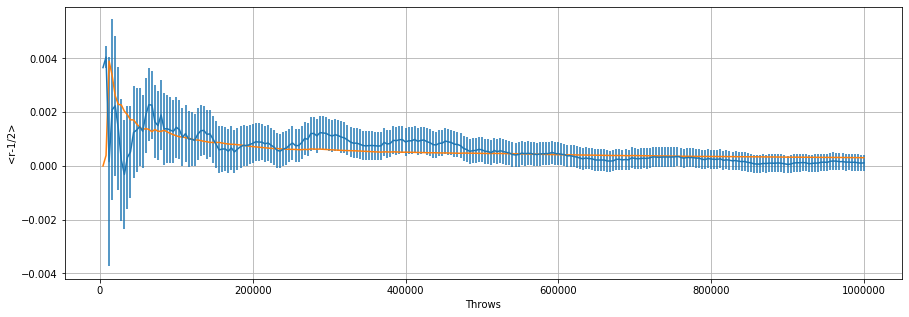

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, average, error = np.loadtxt("./average.out", usecols=(0, 1, 2), delimiter=' ', unpack='true')
plt.errorbar(x,average-0.5,yerr=error)
plt.xlabel('Throws')
plt.ylabel('<r-1/2>')
plt.grid(True)

plt.plot(x, error)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.show()

## Esercizio 01.2

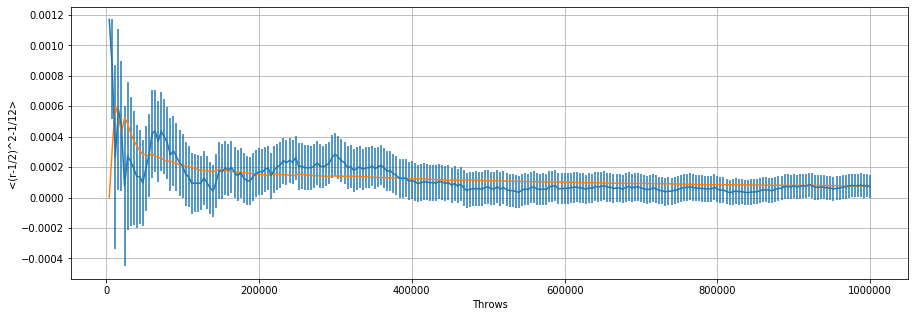

In [5]:
x, sigma, error = np.loadtxt("./error.out", usecols=(0, 1, 2), delimiter=' ', unpack='true')
plt.errorbar(x,sigma-1/12,yerr=error)
plt.xlabel('Throws')
plt.ylabel('<(r-1/2)^2-1/12>')
plt.grid(True)
plt.plot(x, error)
fig2 = plt.gcf()
fig2.set_size_inches(15, 5)
plt.show()

# prova: LETTURA DA FILE CHI QUADRO!!!!! non funziona

#with open("chi.out", "r") as file:
#    file.readline()
#    count = [next(file) for x in range(10)]
file = open("chi.out", "r")
N, bins, chi_squared = file.readline().split()
N = int(N)
bins = int(bins)
chi_squared = float(chi_squared)

#bins = file.readline()
#chi_squared = file.readline()
for x in range(N):
    count = [x/1000]
#count = [next(file) for x in range(100)]
file.close()


100
10000 100 103.36


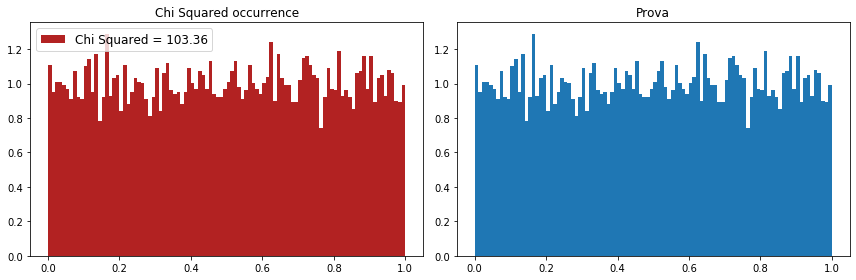

"\nplt.hist(chi_array, bins, density=True, histtype='bar', color='blue', label='Chi Squared = '+chi_squared)\nplt.legend(prop={'size': 10})\nplt.xlabel('Value')\nplt.ylabel('Occurrence')\n\nfig2 = plt.gcf()\nfig = plt.figure()\nfig.figsize(15, 16)\nplt.figure(figsize=(15, 95))\nplt.show()\n"

In [54]:
with open("chi.out") as file:
    try:
        N, bins, chi_squared = file.readline().split()
        N = int(N)
        bins = int(bins)
        print(bins)
    except:
        print("An error occurred (first line)")

    print(N, bins, chi_squared)

    chi_array = []
    for line in file:
        chi_array.extend(float(x) for x in line.split())
    #print(chi_array)
plt.close()
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax0, ax1 = axes.flatten()

col = 'firebrick'
lab = 'Chi Squared = ' + chi_squared
ax0.hist(chi_array, bins, density=True, histtype='bar', color=col, label=lab)
ax0.legend(prop={'size': 12})
ax0.set_title('Chi Squared occurrence')

ax1.hist(chi_array, bins, density=True, histtype='bar', stacked=True)
ax1.set_title('Prova')

fig.tight_layout()
plt.show()

'''
plt.hist(chi_array, bins, density=True, histtype='bar', color='blue', label='Chi Squared = '+chi_squared)
plt.legend(prop={'size': 10})
plt.xlabel('Value')
plt.ylabel('Occurrence')

fig2 = plt.gcf()
fig = plt.figure()
fig.figsize(15, 16)
plt.figure(figsize=(15, 95))
plt.show()
'''

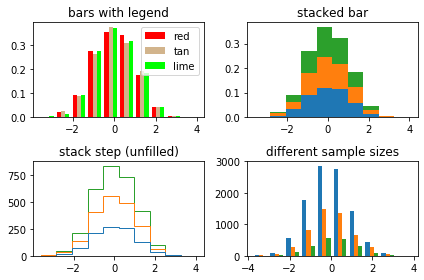

In [42]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()